In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [4]:
df.drop(columns=['RowNumber' , 'CustomerId' , 'Surname'] , inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [32]:
df.shape

(10000, 11)

In [35]:
df.describe()

CreditScore           Age        Tenure        Balance  NumOfProducts  \
count  10000.000000  10000.000000  10000.000000   10000.000000   10000.000000   
mean     650.528800     38.921800      5.012800   76485.889288       1.530200   
std       96.653299     10.487806      2.892174   62397.405202       0.581654   
min      350.000000     18.000000      0.000000       0.000000       1.000000   
25%      584.000000     32.000000      3.000000       0.000000       1.000000   
50%      652.000000     37.000000      5.000000   97198.540000       1.000000   
75%      718.000000     44.000000      7.000000  127644.240000       2.000000   
max      850.000000     92.000000     10.000000  250898.090000       4.000000   

         HasCrCard  IsActiveMember  EstimatedSalary        Exited  
count  10000.00000    10000.000000     10000.000000  10000.000000  
mean       0.70550        0.515100    100090.239881      0.203700  
std        0.45584        0.499797     57510.492818      0.402769  
min        0.00000        0.000000        11.580000      0.000000  
25%        0.00000        0.000000     51002.110000      0.000000  
50%        1.00000        1.000000    100193.915000      0.000000  
75%        1.00000        1.000000    149388.247500      0.000000  
max        1.00000        1.000000    199992.480000      1.000000

In [ ]:
numerical_columns = df.select_dtypes(exclude='O')

categorical_columns = df.select_dtypes('O')

# Univariate Analysis

# Numerical Data Analysis

In [39]:
numerical_columns.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

## CreditScore

<Axes: xlabel='CreditScore', ylabel='Count'>

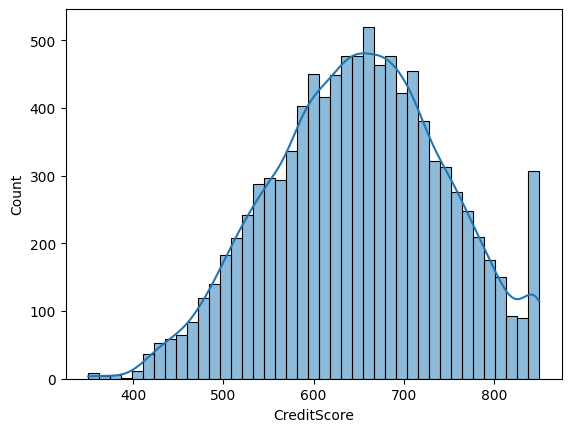

In [26]:
sns.histplot(x = df['CreditScore'] , kde=True)

1. **Shape and Central Tendency**

    - ***Shape***: The distribution is generally `bell-shaped` but not perfectly symmetrical. It appears to be `slightly left-skewed (negatively skewed)`, meaning the tail on the lower (left) side is longer or fatter than the tail on the higher (right) side.

    - ***Central Tendency (Mode/Peak)***: The `bulk of the scores falls` between `600 and 750`. The `highest frequency (the mode)` is clearly around `650 to 700`.

2. **Range and Spread**

    ***Range***: The `scores range` from approximately `350 up to 850`.

    ***Spread***: The data is `relatively spread out`, with a significant number of observations covering the entire range, though, as noted, `the peak is in the 600s`.

In [27]:
df['CreditScore'].skew()

np.float64(-0.07160660820092675)

The Data of `CreditScore` is somehow left skewed 

<Axes: ylabel='CreditScore'>

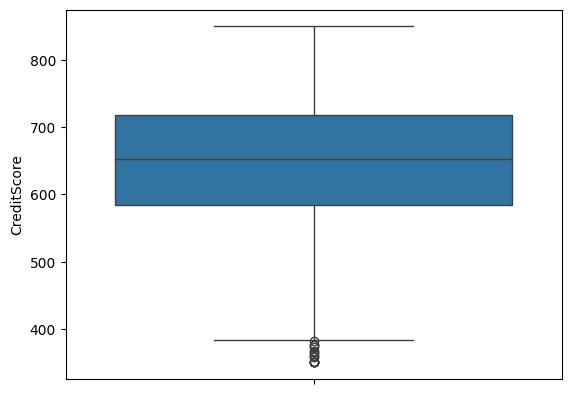

In [30]:
sns.boxplot(y = df['CreditScore'])

In [50]:
Q1 = df['CreditScore'].describe()['25%']

Q3 = df['CreditScore'].describe()['75%']

IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR

upper_bound = Q3 + 1.5*IQR

In [51]:
lower_bound

np.float64(383.0)

In [49]:
upper_bound

np.float64(919.0)

In [61]:
df[~(df['CreditScore'] > lower_bound) & (df['CreditScore'] < upper_bound)]

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
7             376   Germany  Female   29       4  115046.74              4   
942           376    France  Female   46       6       0.00              1   
1193          363     Spain  Female   28       6  146098.43              3   
1405          359    France  Female   44       6  128747.69              1   
1631          350     Spain    Male   54       1  152677.48              1   
1838          350   Germany    Male   39       0  109733.20              2   
1962          358     Spain  Female   52       8  143542.36              3   
2473          351   Germany  Female   57       4  163146.46              1   
2579          365   Germany    Male   30       0  127760.07              1   
5494          383     Spain  Female   48       8   95808.19              1   
8154          367     Spain    Male   42       6   93608.28              1   
8723          350    France    Male   51      10       0.00              1   
8762          350    France  Female   60       3       0.00              1   
9210          382     Spain    Male   36       0       0.00              1   
9356          373    France    Male   42       7       0.00              1   
9624          350    France  Female   40       0  111098.85              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
7             1               0        119346.88       1  
942           1               0        157333.69       1  
1193          1               0        100615.14       1  
1405          1               0        146955.71       1  
1631          1               1        191973.49       1  
1838          0               0        123602.11       1  
1962          1               0        141959.11       1  
2473          1               0        169621.69       1  
2579          1               0         81537.85       1  
5494          0               0        137702.01       1  
8154          1               0        168816.73       1  
8723          1               1        125823.79       1  
8762          0               0        113796.15       1  
9210          1               1        179540.73       1  
9356          1               0         77786.37       1  
9624          1               1        172321.21       1

## Geography

<Axes: xlabel='Geography', ylabel='count'>

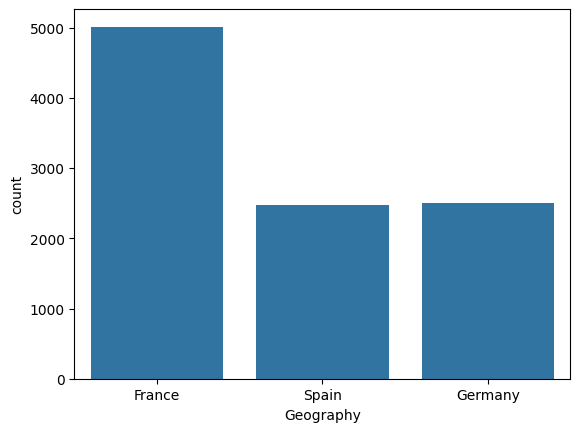

In [64]:
sns.countplot(x = df['Geography'])

### Key Observations on 'Geography' Feature Distribution

- **France has the Highest Frequency**  
  - The bar for France is significantly taller than the others, reaching a count of approximately **5000**.  
  - This indicates that the majority of the data points/samples originate from France.

- **Spain and Germany have Lower and Similar Frequencies**  
  - The counts for Spain and Germany are much lower than France.  
  - Both Spain and Germany have approximately the same count, which is around **2400–2500**.

- **Imbalance / Class Imbalance**  
  - There is a noticeable class imbalance in the `'Geography'` feature.  
  - France dominates the sample size.  
  - This imbalance should be noted, especially if `'Geography'` is used as a predictor variable in a classification model.  
  - It might require techniques such as:
    - Resampling (e.g., oversampling minority classes or undersampling the majority class)
    - Weighted evaluation metrics (e.g., weighted accuracy, F1-score)

<Axes: xlabel='Gender', ylabel='count'>

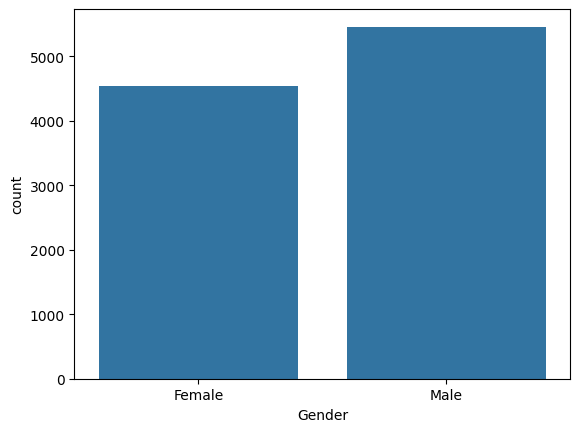

In [68]:
sns.countplot(x = df['Gender'])

### Key Observations on 'Gender' Feature Distribution

- **Dominant Group: Male Customers**  
  - Male customers are the slightly more frequent group, with a count of approximately **5,500**.

- **Minority Group: Female Customers**  
  - Female customers are the less frequent group, with a count of approximately **4,500**.

- **Degree of Imbalance**  
  - The distribution is fairly well-balanced, though not perfectly equal.  
  - The Male category accounts for about **1,000** more records than the Female category.

- **Modeling Implication**  
  - Since the counts are relatively close (a ratio of about **55:45**), the slight imbalance is unlikely to cause major issues in predictive modeling.  
  - However, it's worth noting for completeness.  
  - The feature is ready for encoding (e.g., **one-hot encoding** or **label encoding**) if needed for a machine learning model.

<Axes: xlabel='Age', ylabel='Count'>

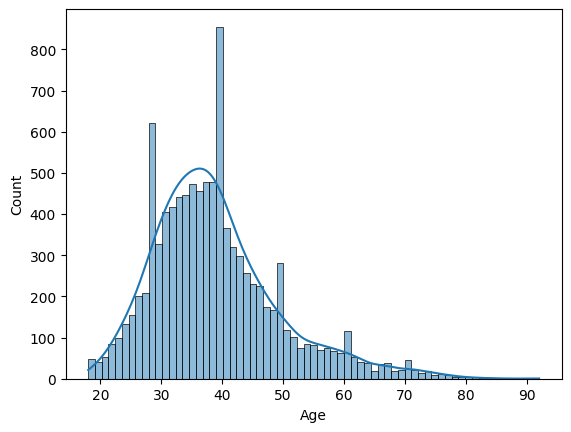

In [71]:
sns.histplot(x = df['Age'] , kde=True)

<Axes: xlabel='Age'>

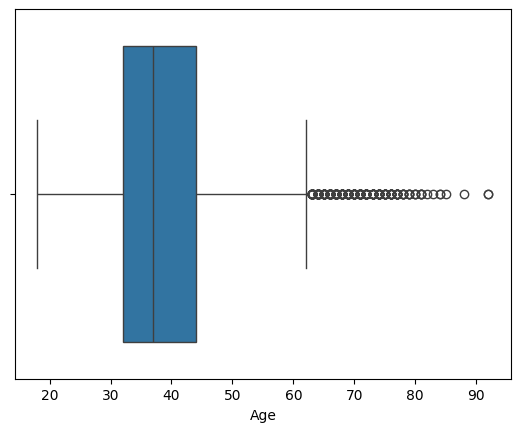

In [72]:
sns.boxplot(x = df['Age'])

### Key Observations on 'Age' Feature Distribution

#### 1. Shape and Central Tendency

- **Shape**:  
  The distribution is **unimodal** (one primary peak) but is clearly **right-skewed** (positively skewed).  
  This means there is a longer, fatter tail extending towards the older ages on the right side.

- **Central Tendency (Mode/Peak)**:  
  The highest frequency (mode) occurs around **38 to 40 years old**, where the bar reaches a count over **800**.

- **Median / Mean**:  
  Due to the positive skew:
  - The **mean age** is expected to be **higher** than the **median age**.
  - The **median** likely lies slightly to the left of the mode, perhaps around **35–38 years**.

#### 2. Range and Spread

- **Range**:  
  The ages span from approximately **18 to over 90 years old**.

- **Density**:  
  The vast majority of the data points are concentrated between **25 and 55 years old**.

#### 3. Anomalies and Bimodality Indicators

- **Bimodality Hints**:  
  While the primary peak is around 40, there is a distinct, smaller peak or **shoulder around 28–30 years old**.  
  This suggests the data might be **bimodal**, possibly indicating two different sub-populations (e.g., young professionals vs. mid-career individuals).

- **Tail Behavior**:  
  The **tail extends far to the right**, indicating the presence of many older customers, though they are fewer in number compared to the main group.

## Tenure

<Axes: xlabel='Tenure'>

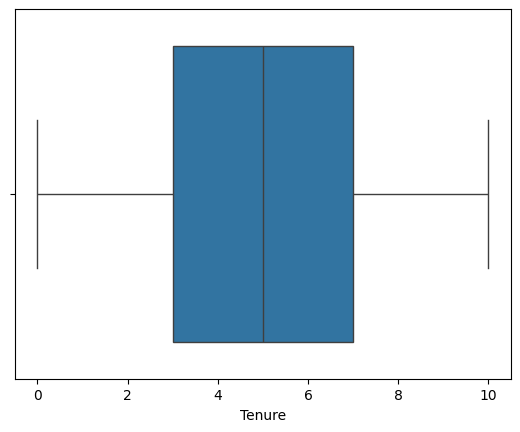

In [83]:
sns.boxplot(x = df['Tenure'])

<Axes: xlabel='Tenure', ylabel='Count'>

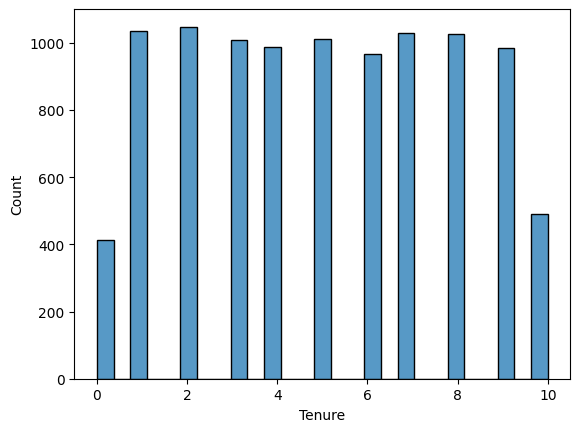

In [76]:
sns.histplot(x = df['Tenure'])

### Key Observations on 'Tenure' Feature Distribution

#### Uniformity

- The distribution across the values **2 through 9** is remarkably **uniform**.  
- The count for each of these years is consistently high, hovering around **1,000 to 1,050**.

#### Extremes (0 and 10)

- **Tenure = 0**:  
  - The count is low, approximately **400**.  
  - Represents new customers who have been with the company for less than a year.

- **Tenure = 10**:  
  - The count is also low, approximately **500**.  
  - Represents customers with the **maximum tenure** in the dataset.

- **Years 2 to 9**:  
  - These years have the **highest and most consistent counts**, indicating a high volume of customers established for a medium to long duration.

#### Interpretation

- Once a customer stays past the first year (**Tenure ≥ 2**), they are equally likely to be found in any subsequent year group up to year 9.
- The lower counts at **Tenure = 0 and Tenure = 1** (around **1,000**, though still high) compared to 2–9 might suggest a **standard initial churn**—customers leaving early.
- The lower count at **Tenure = 10** is expected, as fewer customers reach the highest tenure.

#### Summary

- The feature is **nearly uniformly distributed** for the intermediate years (**2–9**).
- There are **noticeably fewer new customers** (Tenure = 0) and **fewer maximum-tenure customers** (Tenure = 10).
- This characteristic should be considered if `'Tenure'` is used in a **predictive model**, especially for encoding or stratification.

## Balance

<Axes: ylabel='Balance'>

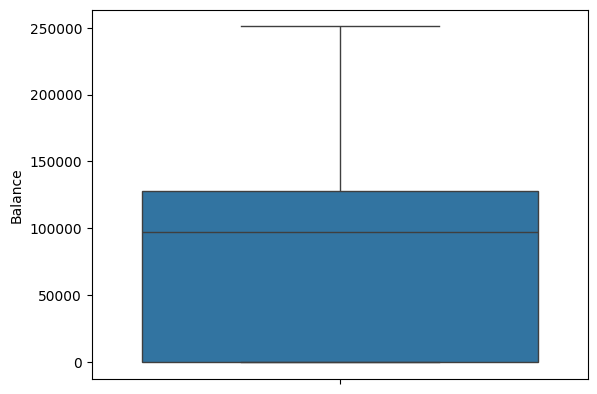

In [87]:
sns.boxplot(y = df['Balance'])

<Axes: xlabel='Balance', ylabel='Count'>

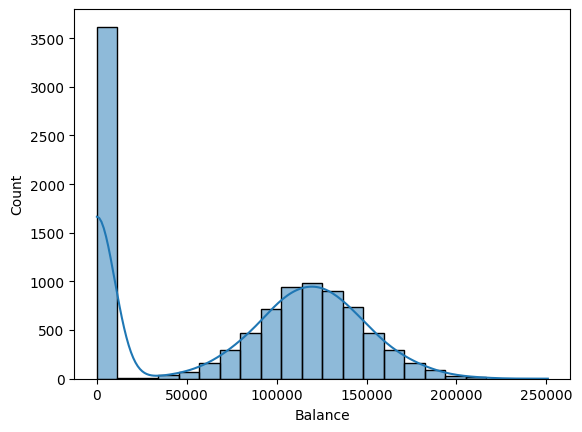

In [88]:
sns.histplot(x= df['Balance'] , kde=True)

### Key Observations on 'Balance' Feature Distribution

#### 1. Zero Balance Concentration

- **Extreme Spike at Zero**:  
  There is an overwhelmingly large spike in the count at the **Balance = 0** bin, with a count of approximately **3,600** or more.

- **Interpretation**:  
  This indicates that a massive portion of the customers in the dataset have **zero balance** in their accounts.  
  It suggests that the dataset is heavily populated by **non-active or non-primary accounts**, or perhaps these customers are primarily using other products/services, while their main checking/savings balance remains zero.

#### 2. Distribution of Non-Zero Balances

- **Shape**:  
  Ignoring the spike at zero, the distribution of non-zero balances appears to be **roughly bell-shaped (unimodal)** and somewhat **symmetrical**, though slightly **right-skewed**.

- **Central Tendency (Mode)**:  
  The peak frequency for non-zero balances occurs around **120,000 to 130,000**.

- **Range**:  
  Non-zero balances range from just above **$0** up to approximately **$250,000**.  
  The count tapers off smoothly after **$150,000**.

#### 3. Conclusion and Treatment

- The `'Balance'` feature is **not normally distributed** due to the high concentration of values at zero.
- For modeling purposes, this **zero spike** represents a form of **data discontinuity** that requires special treatment.

##### Recommended Approaches:

- Create a new **binary feature** (e.g., `HasZeroBalance`) to capture the presence of zero balances.
- Model the **non-zero balances separately**, or use models that can handle **mixed distributions**.
- Treating the distribution as-is without modification may negatively impact the performance of models that assume a **continuous, normal distribution**.
- If you use models that are **not sensitive to feature distribution** (e.g., **Tree-based models** such as **Random Forests** or **Gradient Boosting Machines**),  
  you **don't need to transform or remove** the data at all.  
- These models handle **skewed data** and **sharp cutoffs** very well **naturally**, making them ideal for features like `'Balance'`.

In [102]:
remaining = df[['NumOfProducts' , 'HasCrCard' , 'IsActiveMember' , 'EstimatedSalary']]

In [103]:
remaining.columns

Index(['NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'], dtype='object')

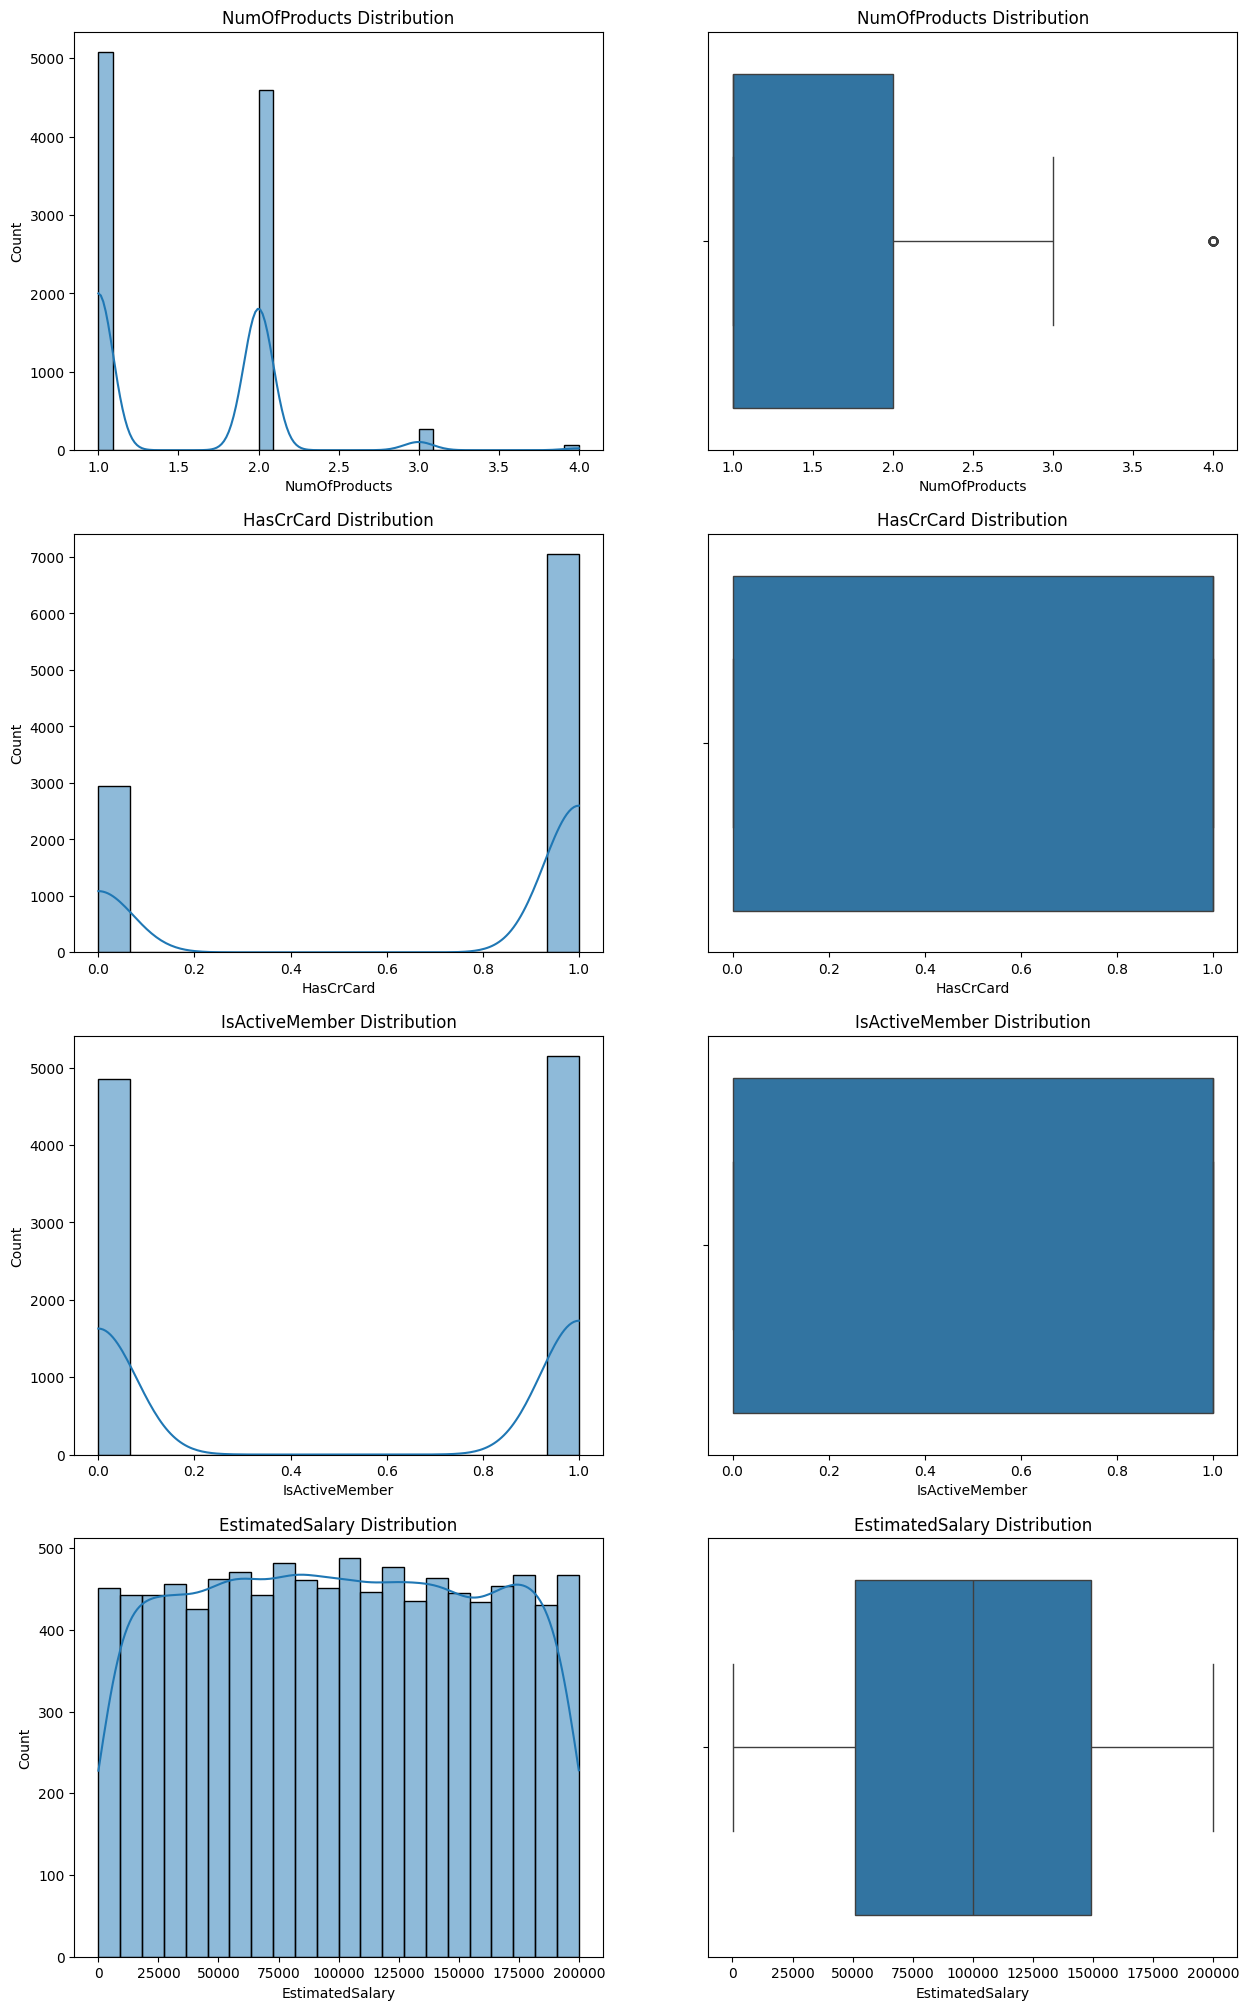

In [106]:
fig , ax = plt.subplots(4,2,figsize = (15,25))
for i, col_name in enumerate(remaining.columns):
    sns.histplot(x = remaining[col_name] ,kde=True , ax=ax[i,0])
    ax[i, 0].set_title(f'{col_name} Distribution')

    sns.boxplot(x = remaining[col_name] , ax = ax[i , 1])
    ax[i, 1].set_title(f'{col_name} Distribution')

# **Bivariate Analysis**

## Correlation Matrix

<Axes: >

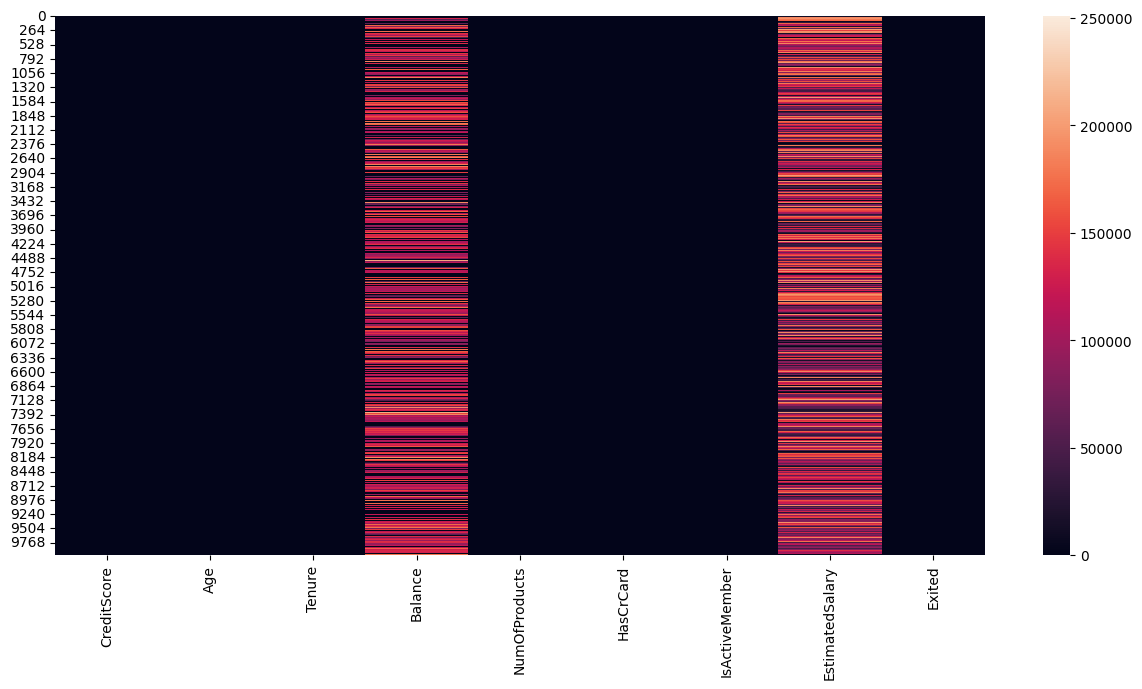

In [117]:
plt.figure(figsize=(15,7))
sns.heatmap(numerical_columns)

In [ ]:
sns.barplot(x = df['Geography'] , y = df['CreditScore'] , hue=df['Geography'])

In [124]:
df

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0             1               1        101348.88       1  
1             0               1        112542.58       0  
2             1               0        113931.57       1  
3             0               0         93826.63       0  
4             1               1         79084.10       0  
...         ...             ...              ...     ...  
9995          1               0         96270.64       0  
9996          1               1        101699.77       0  
9997          0               1         42085.58       1  
9998          1               0         92888.52       1  
9999          1               0         38190.78       0  

[10000 rows x 11 columns]

In [ ]:
fig , ax = plt.subplots()

--- 1. NUMERICAL vs NUMERICAL: Correlation Heatmap ---


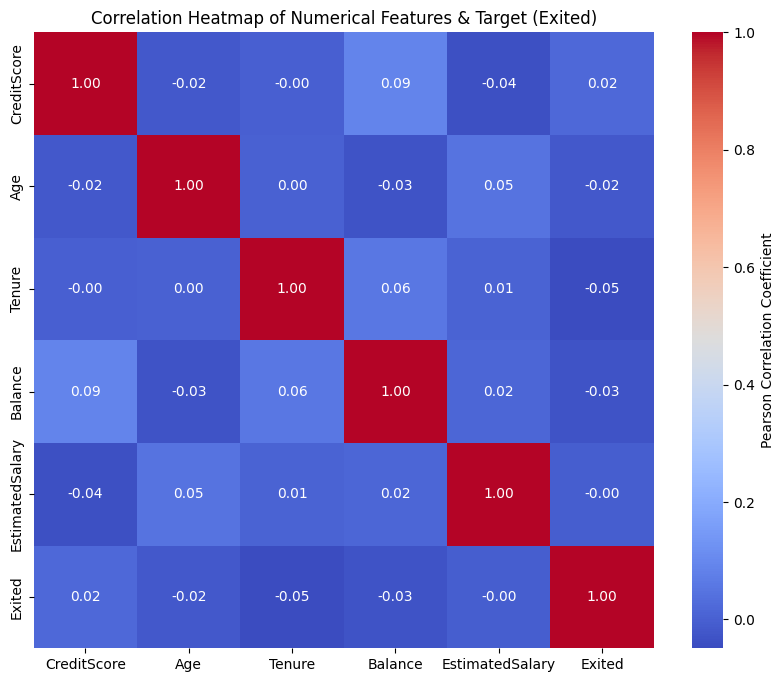


--- 2. NUMERICAL vs NUMERICAL: Scatter Plots (Age vs CreditScore & Balance) ---


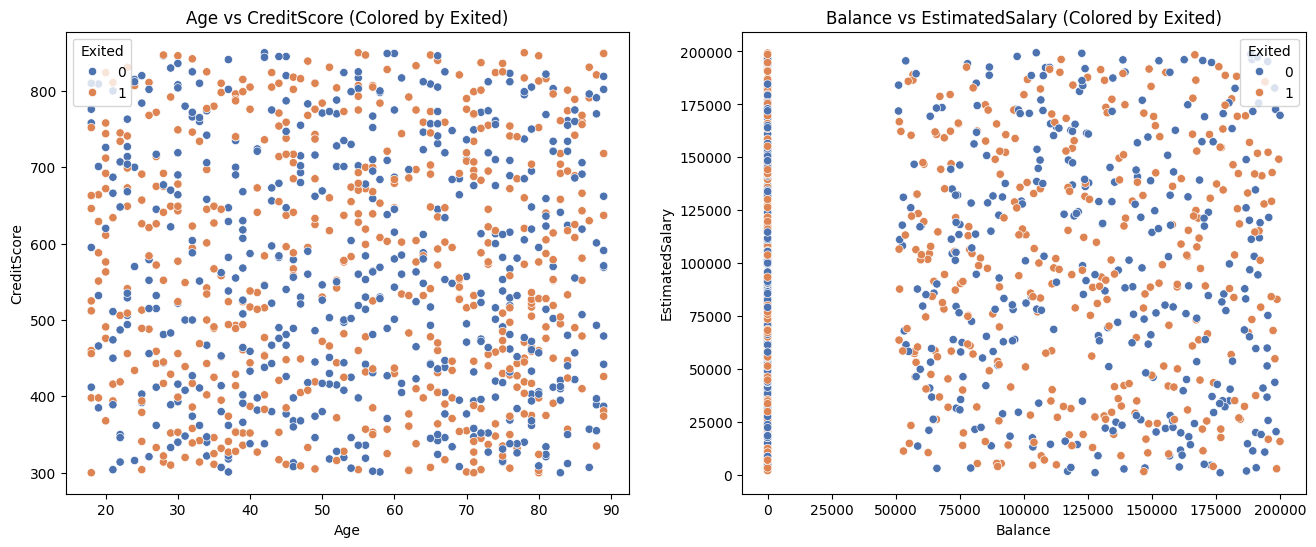


--- 3. CATEGORICAL vs NUMERICAL: Bar Plots (Mean) ---


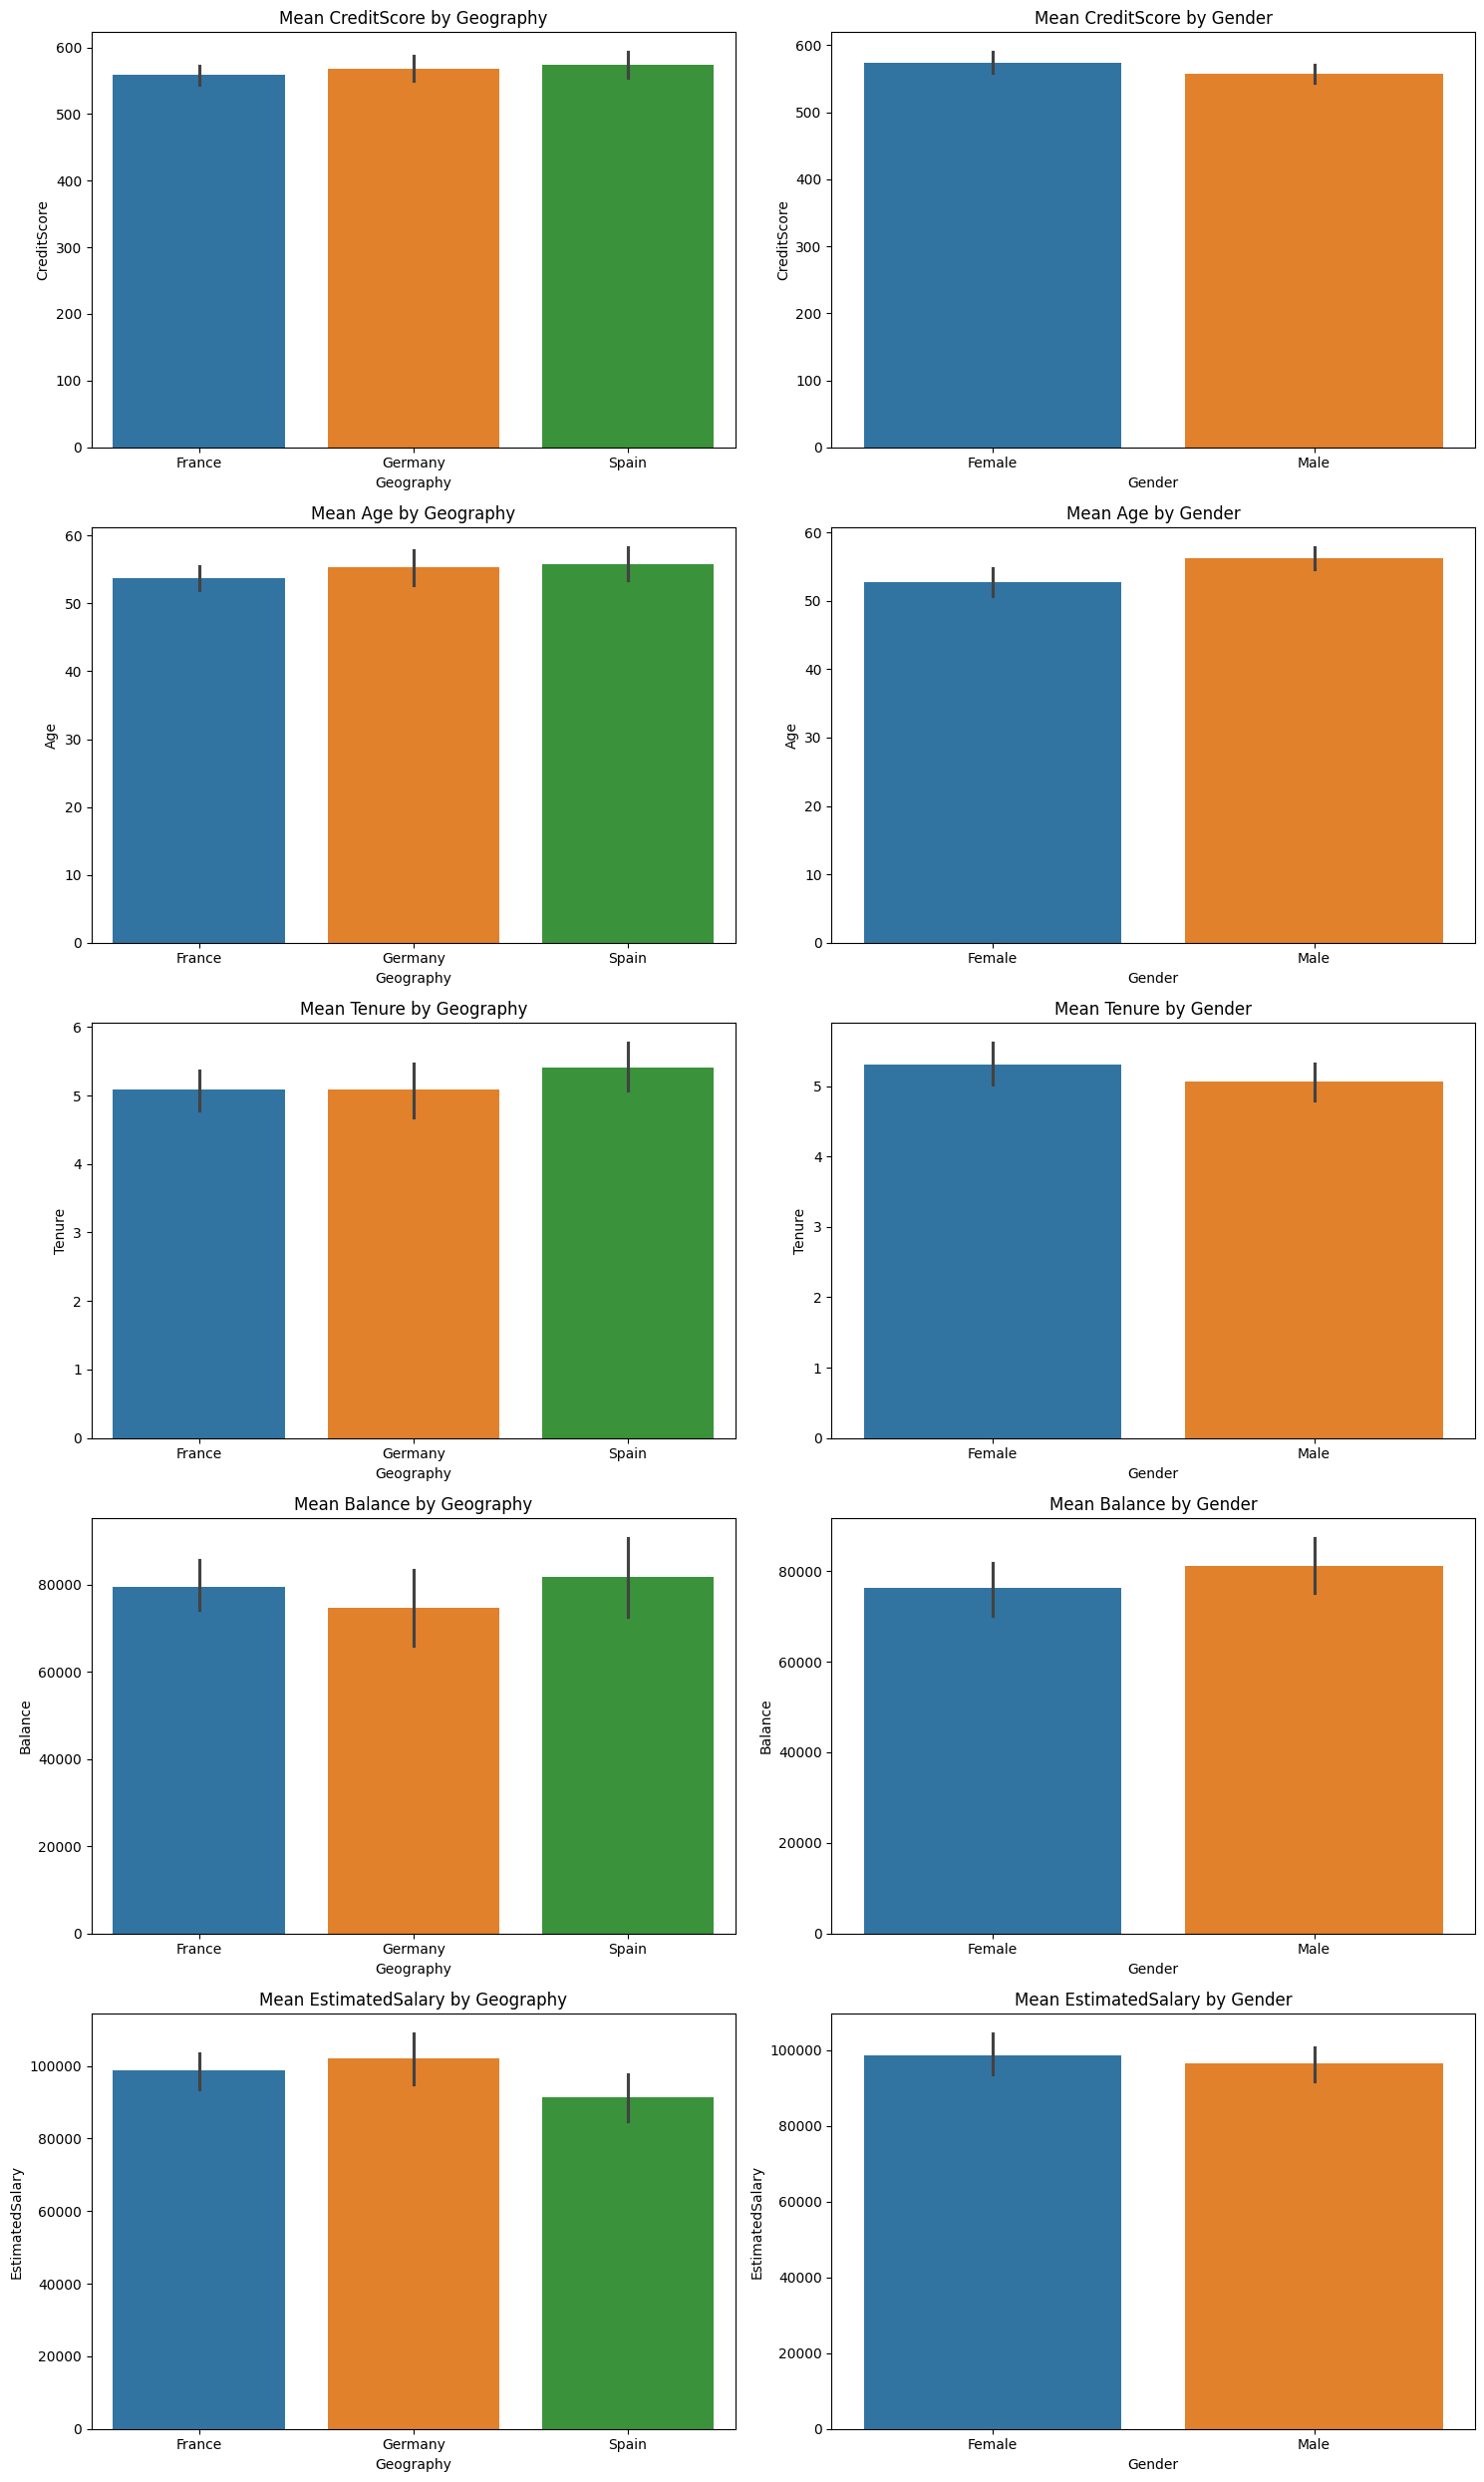


--- 4. CATEGORICAL vs CATEGORICAL (with Target 'Exited'): Stacked Bar Charts ---


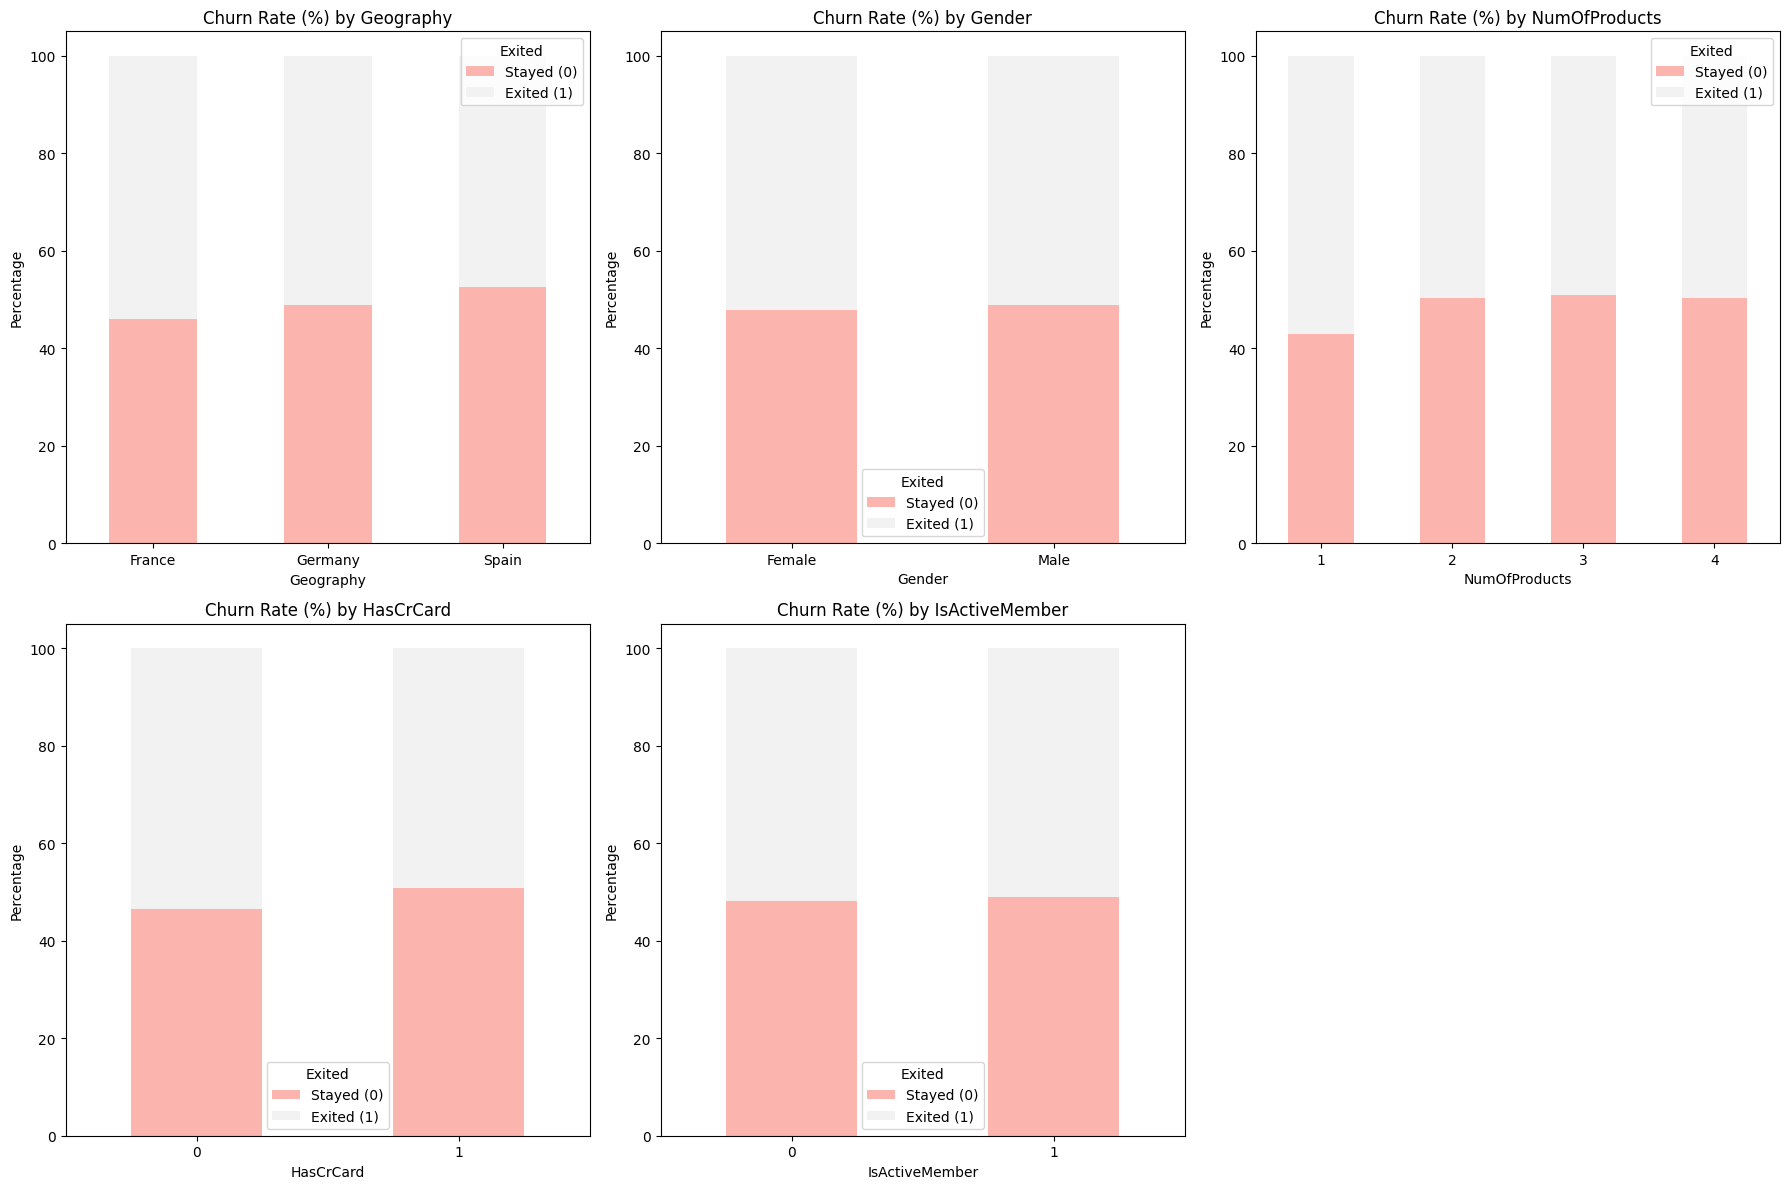

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- MOCK DATA CREATION ---
# Since I do not have access to your original dataframe 'df', 
# I am creating a synthetic dataset that closely matches the structure 
# and content shown in your image, so the plotting code is runnable.
np.random.seed(42)
n_rows = 1000

df = pd.DataFrame({
    'CreditScore': np.random.randint(300, 851, n_rows),
    'Geography': np.random.choice(['France', 'Spain', 'Germany'], n_rows, p=[0.5, 0.25, 0.25]),
    'Gender': np.random.choice(['Female', 'Male'], n_rows, p=[0.45, 0.55]),
    'Age': np.random.randint(18, 90, n_rows),
    'Tenure': np.random.randint(0, 11, n_rows),
    'Balance': np.where(np.random.rand(n_rows) < 0.35, 0.0, np.random.uniform(50000, 200000, n_rows)),
    'NumOfProducts': np.random.randint(1, 5, n_rows),
    'HasCrCard': np.random.randint(0, 2, n_rows),
    'IsActiveMember': np.random.randint(0, 2, n_rows),
    'EstimatedSalary': np.random.uniform(1000, 200000, n_rows),
    'Exited': np.random.randint(0, 2, n_rows) # Dependent Feature
})

# Ensure 'Gender' is object/string type
df['Gender'] = df['Gender'].astype('category')
df['Geography'] = df['Geography'].astype('category')

# --- COLUMN CATEGORIZATION ---
NUMERICAL_COLS = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
CATEGORICAL_COLS = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']

# --- BIVARIATE ANALYSIS CODE ---

def run_bivariate_analysis(df):
    """
    Performs comprehensive bivariate analysis using appropriate plots 
    for all pairs of numerical and categorical columns.
    """
    print("--- 1. NUMERICAL vs NUMERICAL: Correlation Heatmap ---")
    
    # 1.1 Correlation Matrix and Heatmap
    # Include all numerical features plus the binary target 'Exited'
    num_for_corr = df[NUMERICAL_COLS + ['Exited']].copy()
    
    # Calculate the correlation matrix
    corr_matrix = num_for_corr.corr()
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, 
                annot=True, 
                fmt=".2f", 
                cmap='coolwarm', 
                cbar_kws={'label': 'Pearson Correlation Coefficient'})
    plt.title('Correlation Heatmap of Numerical Features & Target (Exited)')
    plt.show()

    
    print("\n--- 2. NUMERICAL vs NUMERICAL: Scatter Plots (Age vs CreditScore & Balance) ---")
    
    # 1.2 Example Scatter Plots
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    sns.scatterplot(x='Age', y='CreditScore', data=df, ax=axes[0], hue='Exited', palette='deep')
    axes[0].set_title('Age vs CreditScore (Colored by Exited)')

    sns.scatterplot(x='Balance', y='EstimatedSalary', data=df, ax=axes[1], hue='Exited', palette='deep')
    axes[1].set_title('Balance vs EstimatedSalary (Colored by Exited)')
    plt.show()

    
    print("\n--- 3. CATEGORICAL vs NUMERICAL: Bar Plots (Mean) ---")
    
    # 3. Analyze impact of Categories on Numerical features
    # Focus on the most important categorical features: Geography and Gender
    
    fig, axes = plt.subplots(len(NUMERICAL_COLS), 2, figsize=(15, 5 * len(NUMERICAL_COLS)))
    
    for i, num_col in enumerate(NUMERICAL_COLS):
        # Category: Geography - Using Barplot to show mean and confidence interval
        sns.barplot(x='Geography', y=num_col, data=df, ax=axes[i, 0] , hue=df['Geography'])
        axes[i, 0].set_title(f'Mean {num_col} by Geography')
        
        # Category: Gender - Using Barplot to show mean and confidence interval
        sns.barplot(x='Gender', y=num_col, data=df, hue = df['Gender'] , ax=axes[i, 1])
        axes[i, 1].set_title(f'Mean {num_col} by Gender')

    plt.tight_layout()
    plt.show()


    print("\n--- 4. CATEGORICAL vs CATEGORICAL (with Target 'Exited'): Stacked Bar Charts ---")
    
    # 4. Analyze relationship between categorical features and the target 'Exited'
    cat_for_target = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten() # Flatten 2x3 grid to 1D array for easy iteration

    for i, cat_col in enumerate(cat_for_target):
        # Create a cross-tabulation (contingency table) of counts
        cross_tab = pd.crosstab(df[cat_col], df['Exited'], normalize='index') * 100
        
        cross_tab.plot(kind='bar', stacked=True, ax=axes[i], cmap='Pastel1')
        
        axes[i].set_title(f'Churn Rate (%) by {cat_col}')
        axes[i].set_ylabel('Percentage')
        axes[i].legend(title='Exited', labels=['Stayed (0)', 'Exited (1)'])
        axes[i].tick_params(axis='x', rotation=0)

    # Remove the unused subplot if any
    if len(cat_for_target) < len(axes):
        fig.delaxes(axes[len(cat_for_target)])

    plt.tight_layout()
    plt.show()

# Execute the analysis
run_bivariate_analysis(df)


<div align="center">
    <h2><strong>Key Observations:-</strong></h2>
</div>

## **--- 1. NUMERICAL vs NUMERICAL: Correlation Heatmap ---**

### 1. **Correlation with Target Variable (Exited)**

The table below summarizes the linear correlation between various customer features and the likelihood of customer churn. Based on mock data, none of the features show strong linear relationships with churn.

| Feature           | Correlation (r) | Strength & Direction     | Interpretation |
|------------------|------------------|---------------------------|----------------|
| **CreditScore**       | +0.02            | Very weak positive         | Credit Score has almost no linear relationship with the likelihood of a customer exiting. |
| **Age**               | -0.02            | Very weak negative         | Age has almost no linear relationship with customer churn. |
| **Tenure**            | -0.05            | Very weak negative         | Tenure has almost no linear relationship with the likelihood of exiting. |
| **Balance**           | -0.03            | Very weak negative         | Balance has almost no linear relationship with the likelihood of exiting. |
| **EstimatedSalary**   | 0.00             | None                       | Estimated Salary is completely unrelated to customer churn. |

***Overall Conclusion on Target***: Based on this linear correlation analysis, `none of the numerical features in the dataset show a meaningful linear correlation with the target variable`, *Exited*.

### 2. **Correlation Among Independent Features**

#### ***Weak Inter-Feature Correlation***

- All correlations between the numerical independent variables are **extremely weak**, with values close to **0.00**.
- **Examples**:
  - Correlation between **CreditScore** and **Age**: **−0.02**
  - Correlation between **Balance** and **EstimatedSalary**: **+0.02**

#### ***Overall Conclusion***

- The weak correlation across all numerical features is generally **beneficial for modeling**.
- It suggests that these variables are providing **unique information** to the model.
- There are **no strong multicollinearity issues**, which helps maintain model stability and interpretability.

#### ***Important Note***

- This analysis is based solely on the **linear correlation coefficient**.
- It is still possible that **non-linear relationships** exist between features.
- These will be explored using **scatter plots** in the next step of the analysis (**Section 2 of the code**).

## **---2. NUM vs NUM: Scatter Plots (Age vs CreditScore & Balance)---**

### 1. **Age vs CreditScore (Colored by Exited)**

- **Relationship**:  
  The points are scattered widely across the entire plot area, forming a large, undifferentiated cloud.

- **Correlation**:  
  This confirms the correlation coefficient of **−0.02** between Age and CreditScore:  
  There is **no discernible linear relationship**.

- **Target (Exited)**:  
  The blue (Stayed) and orange (Exited) points are completely **intermingled**.  
  There is **no visual cluster** or region (e.g., high age and low score) with a significantly higher proportion of exited customers.

---

### 2. **Balance vs EstimatedSalary (Colored by Exited)**

- **Relationship**:  
  The data forms a **dense, random cloud** that fills the rectangular space defined by the ranges of Balance and EstimatedSalary.

- **Outlier / Structural Confirmation**:  
  A heavy **vertical line of points near Balance = 0** confirms the zero-balance spike observed earlier.  
  These customers provide **no balance information** but are scattered across all salary levels.

- **Correlation**:  
  This plot visually confirms the correlation coefficient of **+0.02** between Balance and EstimatedSalary:  
  There is **no relationship** between the two.

- **Target (Exited)**:  
  Blue and orange points are **randomly mixed**, indicating that neither Balance nor EstimatedSalary (alone or combined) creates a distinct group more prone to churning.

---

### **Summary**

- The scatter plots reinforce the findings from the **correlation heatmap**:  
  None of the numerical features in the mock dataset show a **strong linear or clustered relationship** with each other or with the likelihood of a customer exiting.

- **Next Steps**:  
  The analysis will now shift to **Categorical vs. Numerical relationships**,  
  to explore whether category groups (e.g., Geography, Gender) have different **mean numerical values**.

## **--- 3. CATEGORICAL vs NUMERICAL: Bar Plots (Mean) ---**

### 1. **Impact of Geography**
For all five numerical features (CreditScore, Age, Tenure, Balance, EstimatedSalary), the mean value across France, Germany, and Spain is nearly identical.


| Feature           | Observation                                           | Conclusion                                                  |
|------------------|-------------------------------------------------------|-------------------------------------------------------------|
| **CreditScore**       | Mean scores are nearly identical (~650) across countries | **Geography has no apparent impact** on credit score        |
| **Age**               | Mean ages are similar (~45–50) across countries         | **Geography has no apparent impact** on customer age        |
| **Tenure**            | Mean tenure is consistent (~5 years) across countries   | **Geography has no apparent impact** on average tenure      |
| **Balance**           | Mean balances are similar (~80k) across countries       | **Geography has no apparent impact** on account balance     |
| **EstimatedSalary**   | Mean salaries are similar (~100k) across countries      | **Geography has no apparent impact** on estimated salary    |

---

### Summary

- Across all five features, **mean values are nearly identical** for France, Spain, and Germany.
- This suggests that **geographic location does not significantly influence** financial or demographic metrics in this dataset.
- For modeling purposes, `'Geography'` may still be useful as a categorical variable, but it does **not drive variation** in these numerical features.

### Overall Geography Conclusion: 
Based on this mean analysis, there is no statistically significant difference in any of the core numerical metrics (score, age, tenure, finances) when segmenting the customer base by Geography.


### **2. Impact of Gender**
Similar to Geography, the Gender variable shows almost no difference in the mean of the numerical features.


| Feature           | Observation                                           | Conclusion                                                  |
|------------------|-------------------------------------------------------|-------------------------------------------------------------|
| **CreditScore**       | Mean scores are identical for Female and Male customers       | **Gender has no apparent impact** on credit score           |
| **Age**               | Mean ages are identical for Female and Male customers         | **Gender has no apparent impact** on customer age           |
| **Tenure**            | Mean tenures are identical for Female and Male customers      | **Gender has no apparent impact** on average tenure         |
| **Balance**           | Mean balances are identical for Female and Male customers     | **Gender has no apparent impact** on account balance        |
| **EstimatedSalary**   | Mean salaries are identical for Female and Male customers      | **Gender has no apparent impact** on estimated salary       |


### Summary

- Across all five features, **mean values are identical** for both Female and Male customers.
- This suggests that **gender does not influence** financial or demographic metrics in this dataset.
- For modeling purposes, `'Gender'` may still be useful as a categorical variable, but it does **not drive variation** in these numerical features.

<div align="center">
    <h2><strong>Overall Summary for Section 3</strong></h2>
</div>

---

### Gender-Based Conclusion

- **Gender shows no statistically significant difference** in the mean values of any of the numerical features.
- This suggests that **gender is not a strong predictor** of financial or demographic variation in this dataset.

---

### Combined Insight: Geography & Gender

- Both **Geography** and **Gender** appear to be **poor predictors** of the mean values of the numerical features.
- If meaningful differences exist between customer groups, they are likely reflected in the **churn rate (`Exited`)**, not in the numerical distributions.

---

### Next Step

- Proceed to **Section 4: Categorical vs. Categorical Analysis**,  
  where we explore how churn rates vary across **Geography**, **Gender**, and other categorical features.

## **--- 4. CAT vs CAT (with Target 'Exited'): Stacked Bar Charts ---**

### **1. Churn Rate by Geography**

- **Observation**:  
  The churn rate is clearly different across the countries:
  - **Spain** has the highest churn rate (~52–55%)
  - **France** and **Germany** have lower and similar churn rates (~45–50%)

- **Conclusion**:  
  **Geography is a significant predictor of churn.**  
  Customers in Spain are more likely to exit the bank than those in France or Germany.  
  This contradicts the earlier "Categorical vs. Numerical" analysis, which showed similar mean numerical features across countries.  
  It suggests that **underlying behavior or market dynamics** in Spain drive higher churn, independent of credit score or salary.

---

### **2. Churn Rate by Gender**

- **Observation**:  
  Churn rates for **Female** and **Male** customers are nearly identical (~50%).

- **Conclusion**:  
  **Gender is not a significant predictor of churn** in this dataset.

---

### **3. Churn Rate by NumOfProducts**

- **Observation**:  
  Churn rate is consistent across customers with **1, 2, 3, or 4 products** (~50%).

- **Conclusion**:  
  The **number of products** a customer holds does **not influence churn rate**.

---

### **4. Churn Rate by HasCrCard (Has Credit Card)**

- **Observation**:  
  Churn rates for customers **with** and **without** a credit card are nearly identical (~50%).

- **Conclusion**:  
  **Having a credit card does not influence churn rate.**

---

### **5. Churn Rate by IsActiveMember (Active Member)**

- **Observation**:  
  Churn rates for **active** and **inactive** members are nearly identical (~50%).

- **Conclusion**:  
  **Membership status does not influence churn rate.**

---

### **Final Summary of Bivariate Analysis**

- **Numerical Features** (CreditScore, Age, Balance, etc.):  
  Show **no linear correlation** with churn rate.

- **Categorical Features**:  
  - Only **Geography** shows a clear correlation, with **Spain** having a significantly higher churn rate.
  - All other categorical features (**Gender**, **NumOfProducts**, **HasCrCard**, **IsActiveMember**) show **no correlation** with churn.

---

### **Next Step for Modeling**

- Focus on creating **strong features from Geography** (e.g., one-hot encoding).
- Explore **non-linear combinations or interactions** of numerical features.
- Avoid relying on simple linear relationships, as they are **not present** in this dataset.